# 3 MODELIZACIÓN PARA REGRESIÓN - MODELO BASE CON LINEAR REGRESSION - V0

## IMPORTAR PAQUETES

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_absolute_error,mean_squared_error

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

import cloudpickle

## IMPORTAR LOS DATOS

In [26]:
df = pd.read_pickle('../../02_Datos/03_Trabajo/tablon_analitico.pickle')
df.head()

,mpg,desplazamiento,caballos,peso,aceleracion,1200,500,504,amc,aspen,...,subaru,sw,torino,toyota,vega,volkswagen,volvo,cilindros,any_modelo,origen
0,15.00,350.00,165.00,3693.00,11.50,0,0,0,0,0,...,0,0,0,0,0,0,0,8,70,1
1,16.00,304.00,150.00,3433.00,12.00,0,0,0,1,0,...,0,0,0,0,0,0,0,8,70,1
2,15.00,429.00,198.00,4341.00,10.00,0,1,0,0,0,...,0,0,0,0,0,0,0,8,70,1
3,14.00,454.00,220.00,4354.00,9.00,0,0,0,0,0,...,0,0,0,0,0,0,0,8,70,1
4,14.00,440.00,215.00,4312.00,8.50,0,0,0,0,0,...,0,0,0,0,0,0,0,8,70,1


### SEPARAR PREDICTARAS Y TARGET

In [27]:
x = df.drop(columns= 'mpg').copy()
y = df.mpg.copy()

## MODELIZAR

### RESERVAR EL DATASET DE VALIDACIÓN

In [28]:
train_x, val_x, train_y, val_y = train_test_split(x,y, test_size=0.3, random_state= 42)

### INSTANCIAR MODELO

In [29]:
lr = LinearRegression()

### ENTRENAR MODELO

In [30]:
lr.fit(train_x, train_y)

LinearRegression()

In [31]:
modelo = lr.fit(train_x, train_y)

### EVALUAR

#### PREDECIR SOBRE LA VALIDACIÓN

In [32]:
pred = lr.predict(val_x)

In [33]:
mape = mean_absolute_percentage_error(val_y, pred)
mae = mean_absolute_error(val_y,pred)
coef_det = r2_score(val_y,pred)
rmse = mean_squared_error(val_y,pred,squared='False')

print("%mape:", mape)
print("mae:", mae)
print("Coeficiente de determinación:", coef_det)
print("RMSE:", rmse)


%mape: 0.12214325543275435
mae: 2.582500369842764
Coeficiente de determinación: 0.7969419791090067
RMSE: 11.45146716047003


#### Gráfico entre la diferencia entre la validación y el original

In [34]:
test_y = val_y.reset_index().copy()
test_pred = pd.Series(pred).to_frame()
df_pred = pd.concat([test_y,test_pred], axis= 1).sort_values(by='mpg').reset_index()
df_pred.rename(columns = {0:'pred'}, inplace = True)
df_pred = df_pred.drop(columns= ['level_0'])
df_pred['dif'] = abs(df_pred['mpg']-df_pred['pred'])
# Diferencia entre predicción y validación
df_pred.sort_values(by = 'dif', ascending = False)

,index,mpg,pred,dif
36,258,20.20,30.65,10.45
47,237,23.70,32.01,8.31
83,231,43.40,35.15,8.25
53,126,25.00,32.72,7.72
61,262,27.00,34.11,7.11
...,...,...,...,...
27,177,18.60,18.38,0.22
23,137,18.00,17.84,0.16
4,73,12.00,12.03,0.03
57,77,26.00,25.97,0.03


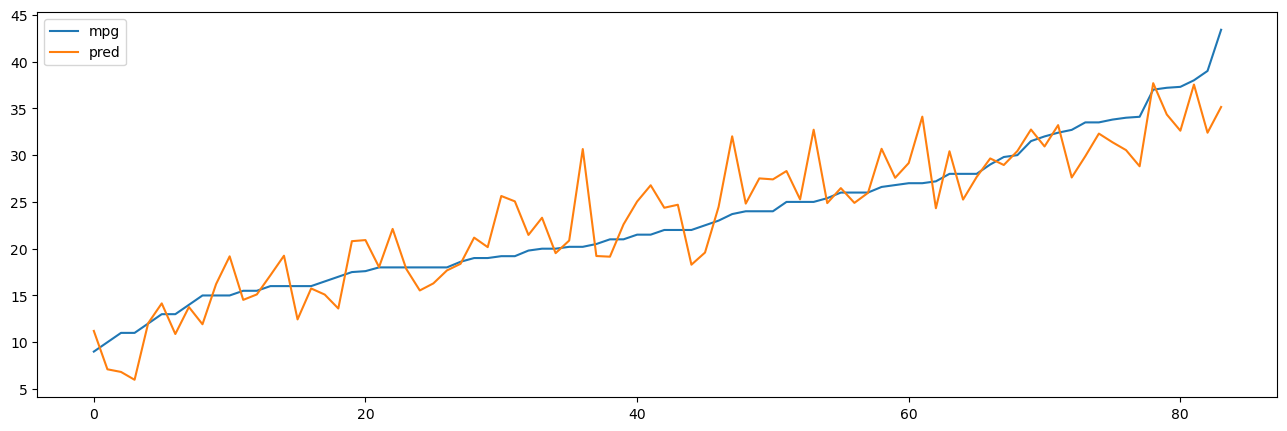

In [35]:
df_pred[['mpg','pred']].plot(figsize=(16,5));

## Gráficios de validación modelos de regresión

1. Gráfico de dispersión de valores reales vs. valores predichos: 

Este gráfico muestra los puntos de datos observados en un diagrama de dispersión, y superpone la línea de regresión que representa la relación lineal ajustada por el modelo. Puedes utilizar este gráfico para evaluar visualmente cómo se ajusta la línea de regresión a los datos observados.

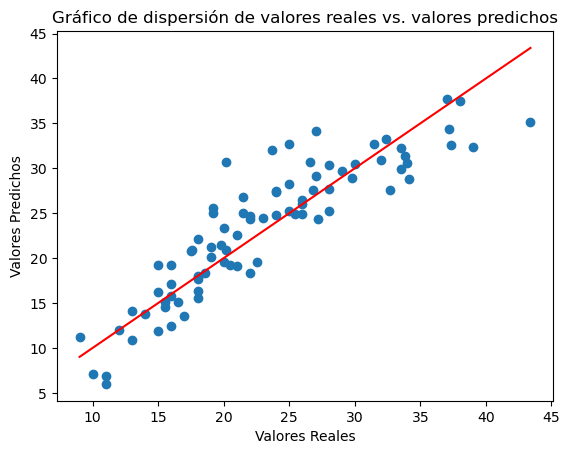

In [36]:
# y = target: Valores reales
# pred - predicción: Valores predichos por el modelo

plt.scatter(val_y, pred)
plt.plot([min(val_y), max(val_y)], [min(val_y), max(val_y)], color='red')  # Línea diagonal
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Gráfico de dispersión de valores reales vs. valores predichos')
plt.show()


2. Gráfico de residuos vs. valores predichos: 


Un gráfico de residuos muestra los residuos (diferencias entre los valores observados y los valores predichos por el modelo) en función de los valores ajustados o las variables independientes. Este gráfico puede ayudarte a verificar si los residuos tienen algún patrón sistemático, como una relación no lineal o una heterocedasticidad.

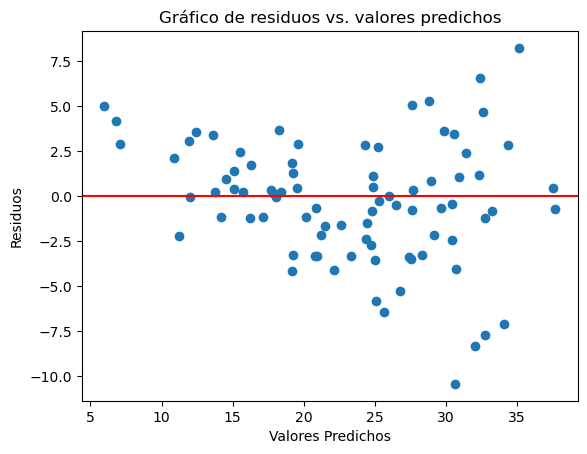

In [37]:
residuos = val_y - pred

plt.scatter(pred, residuos)
plt.axhline(y=0, color='red')  # Línea horizontal en cero
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de residuos vs. valores predichos')
plt.show()


3. Histograma de residuos:

 Este gráfico muestra la distribución de los residuos del modelo. Puedes utilizar un histograma o un gráfico de densidad para visualizar cómo se distribuyen los residuos y verificar si siguen una distribución aproximadamente normal.

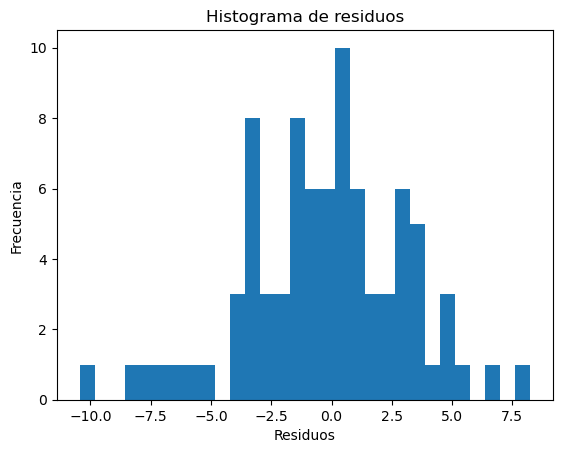

In [38]:
plt.hist(residuos, bins=30)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de residuos')
plt.show()

4. Gráfico de Q-Q (cuantil-cuantil):

Este gráfico compara los cuantiles de los residuos con los cuantiles esperados de una distribución normal. Puede ayudarte a evaluar si los residuos siguen una distribución normal.

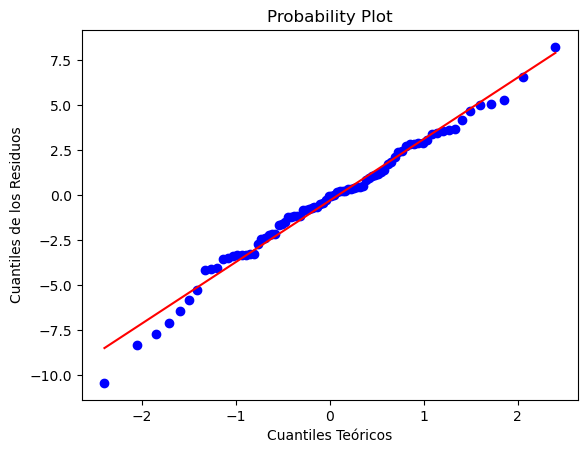

In [39]:
import scipy.stats as stats

residuos = np.asarray(residuos, dtype=float)

stats.probplot(residuos, dist="norm", plot=plt)
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles de los Residuos')
plt.show()


5. Gráfico de influencia:

Un gráfico de influencia muestra la influencia de cada observación en el ajuste del modelo. Puede ayudarte a identificar puntos atípicos o valores influyentes que pueden tener un impacto significativo en los resultados de la regresión.

In [40]:
val_y = pd.to_numeric(val_y, errors='coerce')
pred = pd.to_numeric(pred, errors='coerce')

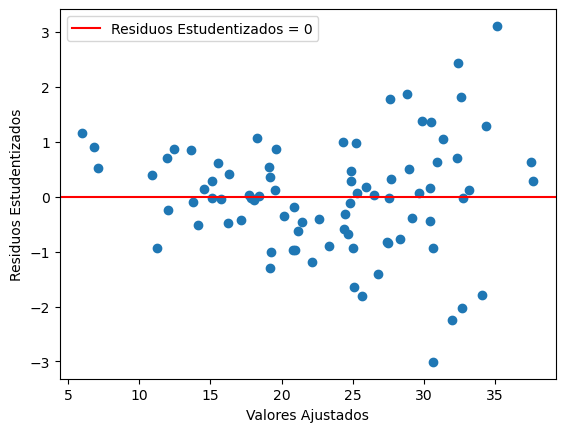

In [41]:
import statsmodels.api as sm

infl = sm.OLS(val_y, sm.add_constant(pred)).fit().get_influence()
residuos_estudentizados = infl.resid_studentized_external

plt.scatter(pred, residuos_estudentizados)
plt.axhline(y=0, color='r', linestyle='-', label='Residuos Estudentizados = 0')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos Estudentizados')
plt.legend()
plt.show()

# GUARDAR BEST_ESTIMATOR, PARÁMETROS Y RESULTADOS DEL TEST Y LA VALIDACIÓN

#### Guardar el mejor estimador

In [42]:
m_best_estimator = 'LinearRegression'
version_estimator = '_v0'
nombre_best_estimator = m_best_estimator + version_estimator + '.pickle'
nombre_best_estimator

'LinearRegression_v0.pickle'

In [43]:
m_best_estimator

'LinearRegression'

In [44]:
ruta_pipe_entrenamiento = '../../04_Modelos/Best_estimator/' + nombre_best_estimator

with open (ruta_pipe_entrenamiento, mode= 'wb') as file:
    cloudpickle.dump(modelo, file)

### Guardar la información del estimador

In [45]:
# Añadir comentarios sobre el modelo

comentarios ="Modelo Base"


In [46]:
#Cargamos la lista con los resultados
resultado  = {'m_Best_estimator': m_best_estimator,
               'm_Best_paramans' : '',
               'm_Best_Score': '', 
               't_%mape': '', 
               't_Coef._determinacion': '', 
               't_mae': '', 
               't_rmse': '', 
               'v_%mape':  mape, 
               'v_Coef._determinacion': coef_det, 
               'v_mae': mae, 
               'v_rmse': rmse,
               'comentarios': comentarios,
               'predictoras_X': '',
               'target_y': ''
            }
resultado= pd.Series(resultado,name=nombre_best_estimator)
resultado

m_Best_estimator         LinearRegression
m_Best_paramans                          
m_Best_Score                             
t_%mape                                  
t_Coef._determinacion                    
t_mae                                    
t_rmse                                   
v_%mape                              0.12
v_Coef._determinacion                0.80
v_mae                                2.58
v_rmse                              11.45
comentarios                   Modelo Base
predictoras_X                            
target_y                                 
Name: LinearRegression_v0.pickle, dtype: object

In [47]:
df_best = pd.read_excel('../../04_Modelos/Best_estimator/Best_estimator.xlsx',index_col=0)


In [48]:
df_best = pd.concat([df_best, resultado], ignore_index= False,axis=1)
df_best.to_excel('../../04_Modelos/Best_estimator/Best_estimator.xlsx')

Los resultados del modelo son buenos con un 80% de determinación.

**PRÓXIMOS PASOS:** 

- Transformación de las variables --> Escalado y normalizar los datos
- Preselección de variables
- Lazy Predict para poner a competir a diferentes modelos.
